# Análise do dataset

## Correlação

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

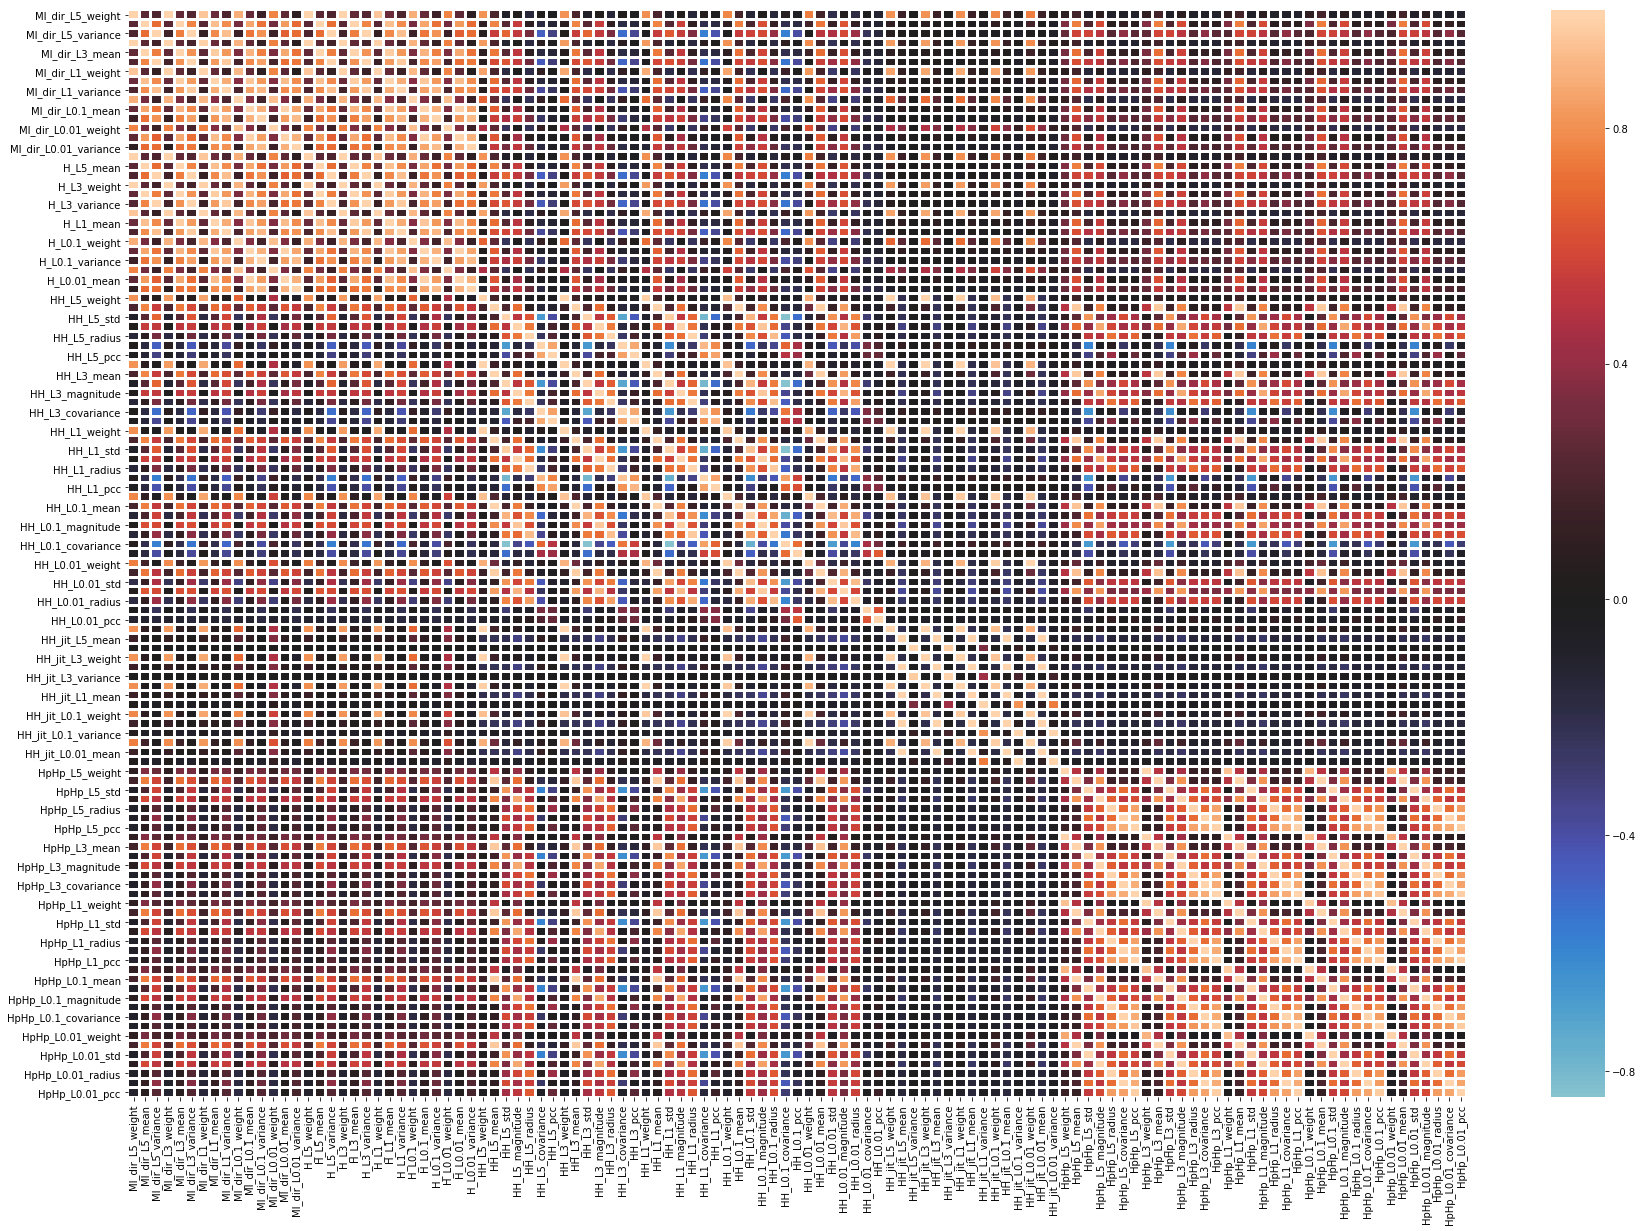

In [3]:
dataset = pd.read_csv('dataset/camera.csv').iloc[:, :-1]

plt.figure(figsize=(30,20))

corr = dataset.corr()

sns.heatmap(
    corr,
    annot = False,
    linewidths = 2,
    center = 0
)

plt.savefig('imagens/corr.png')

In [4]:
import numpy as np

threshold = 0.9

corr.loc[:, :] = np.tril(corr, k=-1)
cols = set()
result = []

for col in corr:
    pcorr = corr[col][corr[col] > threshold].index.tolist()

    if pcorr and col not in cols:
        cols.update(set(pcorr))
        pcorr.append(col)
        result.append(pcorr)

cols = [i for j in [f[1:] for f in result] for i in j]
print(len(cols)) 

88


In [5]:
dataset_t = dataset.drop(cols, axis=1)
dataset_t.shape

(141555, 32)

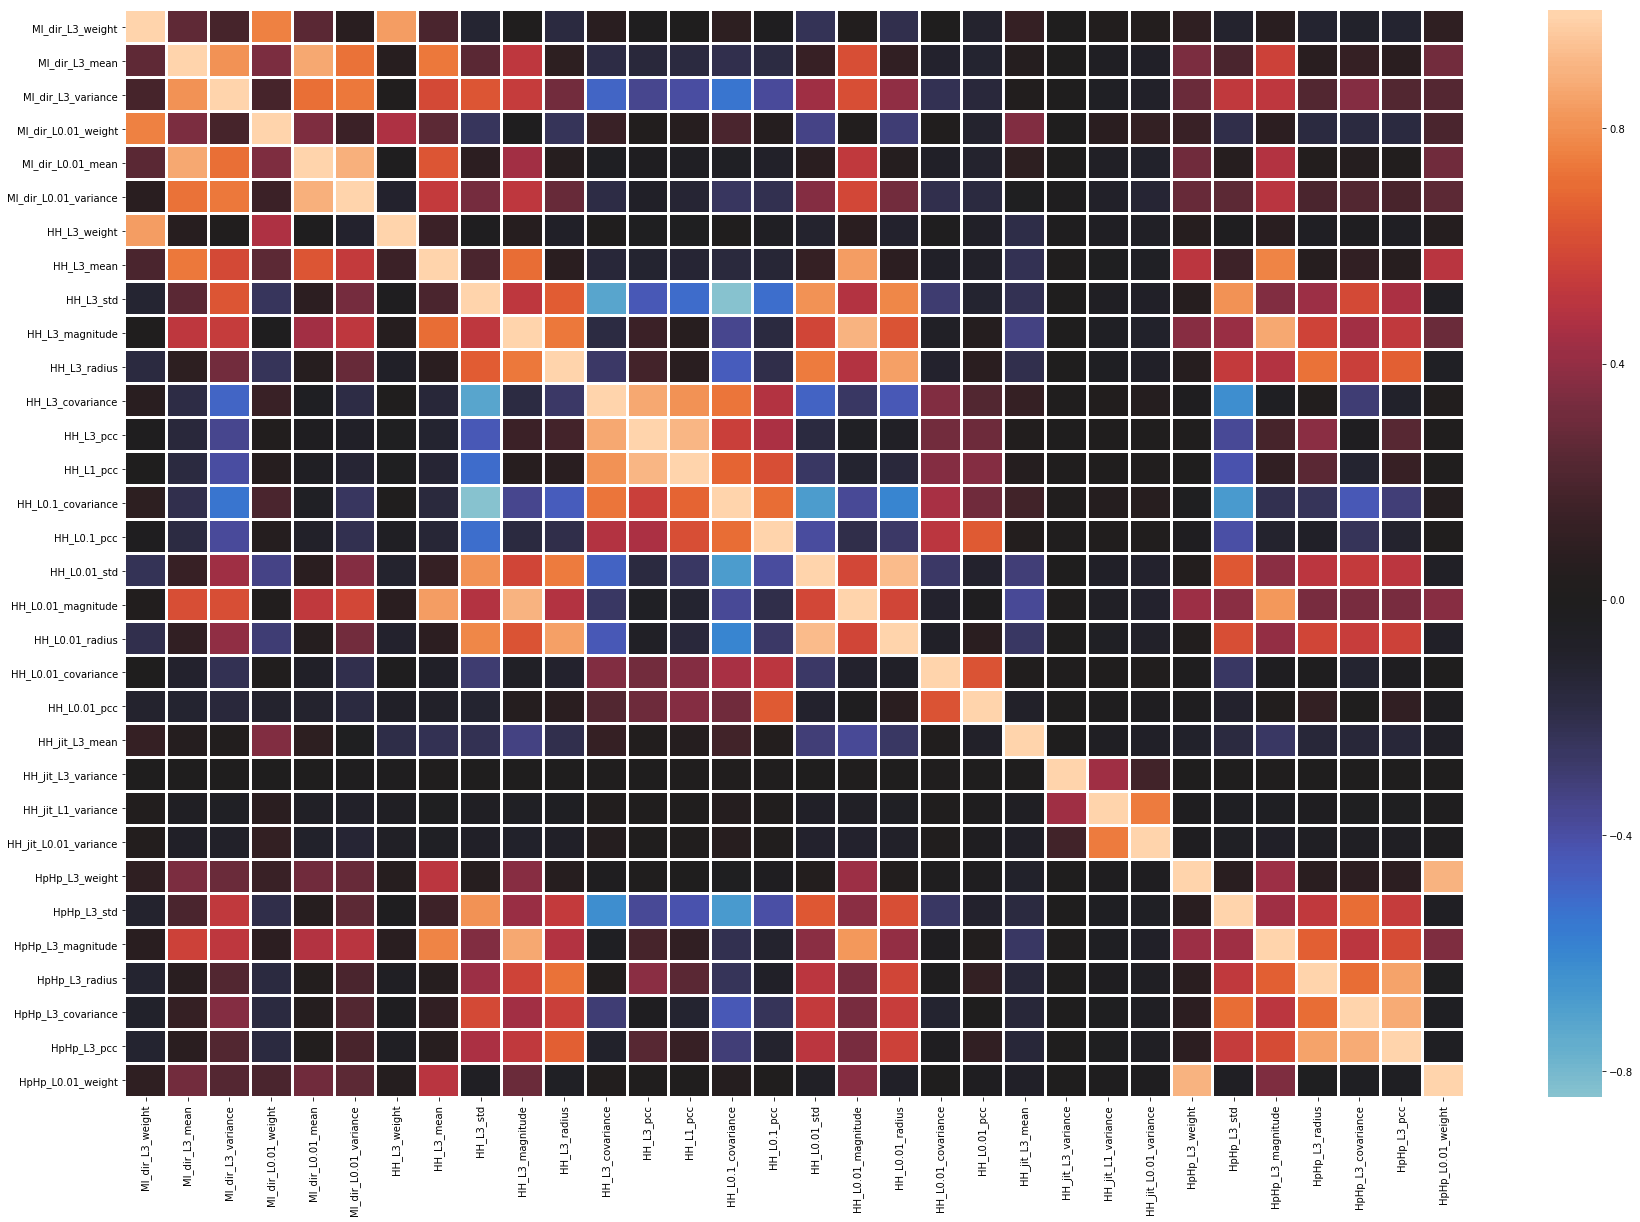

In [6]:
plt.figure(figsize=(30,20))

corr_t = dataset_t.corr()

sns.heatmap(
    corr_t,
    annot = False,
    linewidths = 2,
    center = 0
)

plt.savefig('imagens/corr_t.png')

In [7]:
dataset_t.to_csv('dataset/camera_featred.csv', index=False)